<a href="https://colab.research.google.com/github/estskyway/project_data_analystics/blob/main/codes/LDA/project_review_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install python-mecab-ko pyLDAvis

In [1]:
import numpy as np

### 전처리


In [2]:
import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023pythons/datasets/DB_Total.csv')
df = pd.read_csv('../../datasets/DB_Total.csv')
df

,Unnamed: 0,_id,name,reviews,stars
0,0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.
1,1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.
2,2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.
3,3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.
4,4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.
...,...,...,...,...,...
2873,2873,651277e7ddb81e8e96c6c7f4,Google 사용자,좋아요,NaN
2874,2874,651277e7ddb81e8e96c6c7f5,Google 사용자,좋아용~!,NaN
2875,2875,651277e7ddb81e8e96c6c7f6,Google 사용자,좋아용,NaN
2876,2876,651277e7ddb81e8e96c6c7f7,Say Cheese,너무느려요,NaN


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df

,_id,name,reviews,stars
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.
...,...,...,...,...
2873,651277e7ddb81e8e96c6c7f4,Google 사용자,좋아요,NaN
2874,651277e7ddb81e8e96c6c7f5,Google 사용자,좋아용~!,NaN
2875,651277e7ddb81e8e96c6c7f6,Google 사용자,좋아용,NaN
2876,651277e7ddb81e8e96c6c7f7,Say Cheese,너무느려요,NaN


### reviews에 대한 결측치 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      2878 non-null   object
 1   name     2878 non-null   object
 2   reviews  2878 non-null   object
 3   stars    2118 non-null   object
dtypes: object(4)
memory usage: 90.1+ KB


In [5]:
df['reviews'].isnull().sum()
df['reviews']

0       입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...
1       정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...
2       입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...
3       평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...
4       아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...
                              ...                        
2873                                                  좋아요
2874                                                좋아용~!
2875                                                  좋아용
2876                                                너무느려요
2877                                                아주좋아여
Name: reviews, Length: 2878, dtype: object

### 형태소 토큰화

In [6]:
reviews = ' '.join(df['reviews'])
reviews

'입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔이 아닌 어플에서 입장하기로 바뀌어 사용치 못 하고 있습니다. 매달 이용료는 나가고 있는 상황이면 고쳐지기 전까지 이용못했던 일자에 대해 보상처리는 되나요?어플을 지웠다 다시 다운 받아봐도 똑같은 상태입니다. 도대체 언제부터 전 사용 가능한가요? 정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말 업뎃이후 문제임 둘. 은행도 아닌데 로그인 타임아웃 적용하나요? 어디까지 사용자 불편을 감수하면서 가실려고.. 셋.충분하게 Test하고 업뎃적용하시는지? 근래 며칠이 멀다 화면이 바뀌는데 순전 관리용이지 고객은 안중에도 없어보임 뭐에 쫒기듯 어설프다 입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데이트 후에 매번 로그인 다시해야하고 위치 자동검색에 시설이 안나오고, 수동검색후 입장하는 기능도 없고 불편함만 늘었습니다. 덕분에 앱 여러번 삭제하고 다시까느라 애꿎은 데이타만 잔뜩쓰고 다시 예전 앱으로 돌아가고 싶습니다 평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말 딱입니다! 제휴 업체도 꾸준히 추가되서 새로운 업체 방문하는게 요즘 낙이네요. 입장방식도 바코드에서 GPS로 바뀌면서 좀 더 편해지고 사용자편의적으로 개선이 되어가고 있어서 좋습니다. 앞으로도 좋은 제휴업체 많이 추가해주세요!!!! 아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 사용지점이 많아서 출장이나 본가에 가게되도 지속적으로 쓸수있는점이 짱이예요! 라이프 코스도 같이 이용중인데 덕분에 카페이용비가 확 낮아졌어요 완전 대박 😀😀 작년부터 계속 이용하고 있는 아이코젠, 정말 좋아요. 축 처져있는 여름날씨에도 운동하게 만들어줘요. 앱이 누구나 알아보기 쉽고 편리하게 되어 있어요. 이용내역을 통해 내가 언제 얼마나 이용했는지 정확하게 알 수 있어서 코로나로 힘든 시국에도 편리하고 안전하게 운동

In [7]:
from mecab import MeCab
mecab = MeCab()

In [8]:
mecab.morphs(reviews)

['입장',
 '방식',
 '은',
 '변경',
 '됐',
 '는데',
 '어',
 '플',
 '은',
 '여전히',
 '바코드',
 '만',
 '보여집니다',
 '.',
 '짐',
 '에서',
 '는',
 '더',
 '이상',
 '바코드',
 '스캔',
 '이',
 '아닌',
 '어',
 '플',
 '에서',
 '입장',
 '하',
 '기',
 '로',
 '바뀌',
 '어',
 '사용',
 '치',
 '못',
 '하',
 '고',
 '있',
 '습니다',
 '.',
 '매달',
 '이용료',
 '는',
 '나가',
 '고',
 '있',
 '는',
 '상황',
 '이',
 '면',
 '고쳐',
 '지',
 '기',
 '전',
 '까지',
 '이',
 '용못',
 '했',
 '던',
 '일자',
 '에',
 '대해',
 '보상',
 '처리',
 '는',
 '되',
 '나요',
 '?',
 '어',
 '플',
 '을',
 '지웠',
 '다',
 '다시',
 '다운',
 '받',
 '아',
 '봐도',
 '똑같',
 '은',
 '상태',
 '입니다',
 '.',
 '도대체',
 '언제',
 '부터',
 '전',
 '사용',
 '가능',
 '한가요',
 '?',
 '정말',
 '답답',
 '하',
 '네요',
 '하나',
 '.',
 'GPS',
 '100',
 '프로',
 '신뢰',
 '하',
 '나요',
 '?',
 '시설',
 '선택',
 '목록',
 '에서',
 '안',
 '보임',
 '4',
 '월',
 '말',
 '업',
 '뎃',
 '이후',
 '문제',
 '임',
 '둘',
 '.',
 '은행',
 '도',
 '아닌데',
 '로그인',
 '타임아웃',
 '적용',
 '하',
 '나요',
 '?',
 '어디',
 '까지',
 '사용',
 '자',
 '불편',
 '을',
 '감수',
 '하',
 '면서',
 '가',
 '실려고',
 '.',
 '.',
 '셋',
 '.',
 '충분',
 '하',
 '게',
 'Test',
 '하',
 '고',
 '업',
 

In [9]:
morphs = mecab.pos(reviews)
morphs

[('입장', 'NNG'),
 ('방식', 'NNG'),
 ('은', 'JX'),
 ('변경', 'NNG'),
 ('됐', 'XSV+EP'),
 ('는데', 'EC'),
 ('어', 'IC'),
 ('플', 'NNG'),
 ('은', 'JX'),
 ('여전히', 'MAG'),
 ('바코드', 'NNG'),
 ('만', 'JX'),
 ('보여집니다', 'VV+EC+VX+EF'),
 ('.', 'SF'),
 ('짐', 'NNG'),
 ('에서', 'JKB'),
 ('는', 'JX'),
 ('더', 'MAG'),
 ('이상', 'NNG'),
 ('바코드', 'NNG'),
 ('스캔', 'NNP'),
 ('이', 'JKC'),
 ('아닌', 'VCN+ETM'),
 ('어', 'IC'),
 ('플', 'NNG'),
 ('에서', 'JKB'),
 ('입장', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('로', 'JKB'),
 ('바뀌', 'VV'),
 ('어', 'EC'),
 ('사용', 'NNG'),
 ('치', 'XSN'),
 ('못', 'MAG'),
 ('하', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('매달', 'MAG'),
 ('이용료', 'NNG'),
 ('는', 'JX'),
 ('나가', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('는', 'ETM'),
 ('상황', 'NNG'),
 ('이', 'VCP'),
 ('면', 'EC'),
 ('고쳐', 'VV+EC'),
 ('지', 'VX'),
 ('기', 'ETN'),
 ('전', 'NNG'),
 ('까지', 'JX'),
 ('이', 'MM'),
 ('용못', 'NNG'),
 ('했', 'XSV+EP'),
 ('던', 'ETM'),
 ('일자', 'NNG'),
 ('에', 'JKB'),
 ('대해', 'VV+EC'),
 ('보상', 'NNG'),
 ('처리', 'NNG'),
 ('는'

In [10]:
def tokenize_reviews_list(reviews):
    tokens = mecab.morphs(reviews)
    return ' '.join(tokens)

In [11]:
df['tokenized_review'] = df['reviews'].apply(tokenize_reviews_list)
df[:5]

,_id,name,reviews,stars,tokenized_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...


### 자연어 전처리

#### 유사어 대치

In [14]:
# replace_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2023pythons/datasets/replace_concat.xlsx.xlsx의 사본')
replace_list = pd.read_excel('../../datasets/replace_concat.xlsx')
replace_list[40:50]

,before_replacement,after_replacement
40,😀,좋아요
41,캐시워크,사이트
42,캐시슬라이드,사이트
43,애니핏,사이트
44,삼성헬스,사이트
45,바이탈리티,사이트
46,런데이,사이트
47,아이코젠,사이트
48,라이크핏,사이트
49,어플리케이션,사이트


In [15]:
def replace_word(tokenized_review):
    replaced_review = tokenized_review
    for i in range(len(replace_list['before_replacement'])):
        try:
            if replace_list['before_replacement'][i] in replaced_review:
                replaced_review = replaced_review.replace(replace_list['before_replacement'][i], replace_list['after_replacement'][i])
        except Exception as e:
            # print(f"Error 발생 / 에러명: {e}")
            pass
    return replaced_review

In [16]:
# def replace_word(tokenized_review):
#   replaced_review = str()
#   for i in range(len(replace_list['before_replacement'])):
#     try:
#       # 치환할 단어가 있는 경우에만 데이터 치환 수행
#       if replace_list['before_replacement'][i] in tokenized_review:
#         replaced_review = tokenized_review.replace(replace_list['before_replacement'][i], replace_list['after_replacement'][i])
#       else :
#         replaced_review = tokenized_review
#     except Exception as e:
#       print(f"Error 발생 / 에러명: {e}")
#       replaced_review = tokenized_review
#   return replaced_review

In [17]:
replace_word('입장 시설 검색 곳 입장 기존 앱 업데이트 후 로그인 위치 자동 검색 시설 수동 검색 후 입장 기능 불편 덕분 앱 번 삭제 데 이타 예전 앱')

'입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검색 후 입장 기능 불편 덕분 사이트 번 삭제 데 이타 예전 사이트'

In [18]:
df['replaced_review'] = df['tokenized_review'].apply(replace_word)
df[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...


#### 불용어 처리

In [19]:
# df_stopwords = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2023pythons/datasets/불용어concat.xlsx')
df_stopwords = pd.read_excel('../../datasets/stopword_concat.xlsx')
df_stopwords[:5]

,stopword
0,가
1,가까스로
2,가량
3,가령
4,가민


In [20]:
from konlpy.tag import Okt
okt = Okt()
stopwords = df_stopwords['stopword'].values
# 토크나이징 함수 정의(한자 이상 적용. 불용어 삭제)
def stopword(raw, pos=["Noun",'Adjective',"Alpha","Verb","Number"], stopword=stopwords):
    result_list = list()
    # for word in replaced_review :
    for word, tag in okt.pos(raw, norm=True, stem=True) :
        if tag in pos and word not in stopword:
            result_list.append(word)
    # 일부 경우(토큰 갯수 제한)
    # if len(result_list) <= 3 or len(result_list) < 12 :
    #   result_list
    return ' '.join(result_list) # return str

In [21]:
stopwords = df_stopwords['stopword'].values
# 토크나이징 함수 정의(한자 이상 적용. 불용어 삭제)
def stopword(replaced_review):
    result_list = list()
    # for word in replaced_review :
    for word in mecab.nouns(replaced_review) :
      if word not in stopwords:
          result_list.append(word)
    # 일부 경우(토큰 갯수 제한)
    # if len(result_list) <= 3 or len(result_list) < 12 :
    #   result_list
    return ' '.join(result_list) # return str

In [22]:
stopword('거니와 꿀 꿈 갖고말하자면 가지 개의치않고 가위바위보 거바')

'거니 꿀 꿈 말 개'

In [23]:
stopword('가까스로,가량,가령,가민,가슴,가슴살,가요,가위바위보,가지,각,각각,각자,각종,갖고말하자면,같다,같아요,같이,개별로,개월,개의치않고,거기,거니와,거바,거의,건가,건가요,건데,건지,걸까요,걸로')

'말 개별 개의 거니 거 바'

In [24]:
df['stopword_review'] = df['replaced_review'].apply(stopword)
df[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...


### 한단어 처리

In [25]:
# df_oneword = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2023pythons/datasets/한단어_concat.xlsx')
df_oneword = pd.read_excel('../../datasets/oneword_concat.xlsx')
df_oneword[:4]

,one_char_keyword
0,값
1,꿀
2,꿈
3,끝


In [26]:
df_stopword_review = df['stopword_review']
df_stopword_review

0       입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...
1       프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...
2       입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...
3       이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...
4       아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...
                              ...                        
2873                                                     
2874                                                     
2875                                                     
2876                                                     
2877                                                     
Name: stopword_review, Length: 2878, dtype: object

In [27]:
onewords = df_oneword['one_char_keyword'].values

def oneword(df_stopword_review):
    oneword_result_list = list()
    for word in mecab.nouns(df_stopword_review):
        # 대소문자 구분을 무시하고 1글자 키워드를 제거
        if len(word) > 1 or word.lower() in onewords:
            oneword_result_list.append(word)
    # 명사가 없으면 None 반환
    if not oneword_result_list:
        return None
    return ' '.join(oneword_result_list)  # return str

In [28]:
# onewords = df_oneword['one_char_keyword'].values
# def tokenizer2(tokenized_review):
#     oneword_result_list = list()
#     for word in mecab.nouns(tokenized_review) :
#       if len(word) > 0 and word not in onewords :
#         oneword_result_list.append(word)
#     return ' '.join(oneword_result_list) # return str

In [29]:
oneword('아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 비 대박 값 꿀 꿈 앙 팡')

'아이코 덕분 운동 기록 지점 출장 본가 지속 수 라이프 코스 덕분 대박 값 꿀 꿈'

In [30]:
df['oneword_review'] = df['stopword_review'].apply(oneword)
df[-20:]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review
2858,651277e7ddb81e8e96c6c7e5,Tae Shik Jung (야바야바두),감사합니다 아주잘쓰고있습니다!,NaN,감사 합니다 아주 잘 쓰 고 있 습니다 !,감사 합니다 아주 잘 쓰 고 있 습니다 !,감사,감사
2859,651277e7ddb81e8e96c6c7e6,박경희,혹시 30분수업도 가능한가요?,NaN,혹시 30 분 수업 도 가능 한가요 ?,혹시 30 분 수업 도 가능 한가요 ?,분 수업 도 가능,수업 가능
2860,651277e7ddb81e8e96c6c7e7,홍석환,정말 편하고 좋아요,NaN,정말 편하 고 좋 아요,정말 편하 고 좋 아요,,None
2861,651277e7ddb81e8e96c6c7e8,Spiritainer Doeun,회원가입이 안되네요... 약관에 동의를 해도.... 안했대요....,NaN,회원 가입 이 안 되 네요 . .. 약관 에 동의 를 해도 . ... 안 했 대요 ...,회원 회원가입 이 안 되 네요 . .. 약관 에 동의 를 해도 . ... 안 했 대...,회원 회원 가입 약관 동의,회원 회원 가입 약관 동의
2862,651277e7ddb81e8e96c6c7e9,한석와,수강회원 신청 해제는 어떻게 하나요?,NaN,수강 회원 신청 해제 는 어떻게 하 나요 ?,수강 회원 신청 해제 는 어떻게 하 나요 ?,수강 회원 신청 해제,수강 회원 신청 해제
2863,651277e7ddb81e8e96c6c7ea,Google 사용자,예약제 운동센타에선 조아요,NaN,예약 제 운동 센타 에선 조아 요,예약 제 운동 센타 에선 조아 요,예약 운동 센타 조아,예약 운동 센타 조아
2864,651277e7ddb81e8e96c6c7eb,박홍자,진짜 편해요,NaN,진짜 편해요,진짜 편해요,,None
2865,651277e7ddb81e8e96c6c7ec,정연지,자꾸 어플이 종료됨,NaN,자꾸 어 플 이 종료 됨,자꾸 어 플 이 종료 됨,플 종료,종료
2866,651277e7ddb81e8e96c6c7ed,장진혁,호환성이 떨어짐,NaN,호환 성 이 떨어짐,연동 성 이 떨어운동시설,연동 운동 시설,연동 운동 시설
2867,651277e7ddb81e8e96c6c7ee,이승재,다짐 카피캣,NaN,다 짐 카피캣,다 운동시설 카피캣,운동 시설 카피캣,운동 시설 카피캣


### 문장합치기/ 워드클라우드

In [31]:
df['oneword_review'].isnull().sum()

254

In [37]:
# df_oneword_dropna.isnull().sum()

NameError: name 'df_oneword_dropna' is not defined

In [36]:
df_stars_drop = df.drop(['stars'], axis=1)
df_stars_drop 

,_id,name,reviews,tokenized_review,replaced_review,stopword_review,oneword_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...,이동 장소 운동 합리 코젠 제휴 업체 추가 업체 방문 입장 방식 편의 개선 제휴 업...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...,아이코 덕분 운동 기록 지점 출장 본가 지속 수 라이프 코스 덕분 카페이 용비 대박
...,...,...,...,...,...,...,...
2873,651277e7ddb81e8e96c6c7f4,Google 사용자,좋아요,좋 아요,좋 아요,,None
2874,651277e7ddb81e8e96c6c7f5,Google 사용자,좋아용~!,좋 아용 ~!,좋 아용 ~!,,None
2875,651277e7ddb81e8e96c6c7f6,Google 사용자,좋아용,좋 아용,좋 아용,,None
2876,651277e7ddb81e8e96c6c7f7,Say Cheese,너무느려요,너무 느려요,너무 느려요,,None


In [38]:
df_stars_drop.isnull().sum()

_id                   0
name                  0
reviews               0
tokenized_review      0
replaced_review       0
stopword_review       0
oneword_review      254
dtype: int64

In [39]:
df_drop_dropna = df_stars_drop.dropna()
df_drop_dropna

,_id,name,reviews,tokenized_review,replaced_review,stopword_review,oneword_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...,이동 장소 운동 합리 코젠 제휴 업체 추가 업체 방문 입장 방식 편의 개선 제휴 업...
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...,아이코 덕분 운동 기록 지점 출장 본가 지속 수 라이프 코스 덕분 카페이 용비 대박
...,...,...,...,...,...,...,...
2865,651277e7ddb81e8e96c6c7ec,정연지,자꾸 어플이 종료됨,자꾸 어 플 이 종료 됨,자꾸 어 플 이 종료 됨,플 종료,종료
2866,651277e7ddb81e8e96c6c7ed,장진혁,호환성이 떨어짐,호환 성 이 떨어짐,연동 성 이 떨어운동시설,연동 운동 시설,연동 운동 시설
2867,651277e7ddb81e8e96c6c7ee,이승재,다짐 카피캣,다 짐 카피캣,다 운동시설 카피캣,운동 시설 카피캣,운동 시설 카피캣
2868,651277e7ddb81e8e96c6c7ef,NaHyeon Park,편리합니다,편리 합니다,편리 합니다,편리,편리


In [40]:
df_drop_dropna.isnull().sum()

_id                 0
name                0
reviews             0
tokenized_review    0
replaced_review     0
stopword_review     0
oneword_review      0
dtype: int64

In [41]:
# 문장 합치기
text = ' '.join(df_drop_dropna['oneword_review'])
text[:10]

'입장 방식 수정 운'

In [42]:
text_split = text.split()
text_split[:5]

['입장', '방식', '수정', '운동', '시설']

In [43]:
from collections import Counter
Counter(text_split)

Counter({'입장': 77,
         '방식': 9,
         '수정': 23,
         '운동': 883,
         '시설': 696,
         '스캔': 2,
         '사용료': 6,
         '상황': 6,
         '용못': 3,
         '일자': 3,
         '보상': 14,
         '처리': 10,
         '상태': 26,
         '가능': 120,
         '프로': 10,
         '신뢰': 5,
         '선택': 32,
         '목록': 3,
         '문제': 34,
         '은행': 1,
         '로그인': 88,
         '타임아웃': 1,
         '적용': 13,
         '불편': 94,
         '감수': 1,
         '근래': 1,
         '화면': 85,
         '관리': 66,
         '고객': 29,
         '안중': 1,
         '검색': 80,
         '기존': 10,
         '사이트': 469,
         '개선': 253,
         '위치': 36,
         '자동': 26,
         '수동': 4,
         '덕분': 51,
         '삭제': 45,
         '이동': 14,
         '장소': 11,
         '합리': 30,
         '코젠': 66,
         '제휴': 148,
         '업체': 53,
         '추가': 37,
         '방문': 19,
         '편의': 8,
         '아이코': 53,
         '기록': 18,
         '지점': 58,
         '출장': 7,
         '본가': 1

In [44]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

from wordcloud import WordCloud
wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_text(text)

In [46]:
wordCloud.words_

{'수': 1.0,
 '사이트': 0.8062157221206582,
 '운동': 0.7550274223034735,
 '운동 시설': 0.716636197440585,
 '헬스': 0.6691042047531993,
 '개선': 0.4113345521023766,
 '편리': 0.36380255941499084,
 '가격': 0.34552102376599636,
 '결제': 0.23583180987202926,
 '시설': 0.22851919561243145,
 '가능': 0.21937842778793418,
 '오류': 0.21206581352833637,
 '추천': 0.20109689213893966,
 '등록': 0.19744058500914077,
 '기구': 0.1809872029250457,
 '불편': 0.17184643510054845,
 '정보': 0.16819012797074953,
 '다양': 0.15722120658135283,
 '회원 가입': 0.15722120658135283,
 '감사': 0.1480804387568556,
 '시설 박스': 0.1480804387568556,
 '혜택': 0.14625228519195613,
 '하트 하트': 0.14442413162705667,
 '입장': 0.14076782449725778,
 '로그인': 0.14076782449725778,
 '화면': 0.13893967093235832,
 '주변': 0.13711151736745886,
 '제휴': 0.12797074954296161,
 '만족': 0.12797074954296161,
 '지역': 0.12797074954296161,
 '돈': 0.12797074954296161,
 '할인': 0.12614259597806216,
 '관리': 0.1206581352833638,
 '코젠': 0.1206581352833638,
 '접속': 0.11882998171846434,
 '최고': 0.1170018281535649,
 '확인': 0

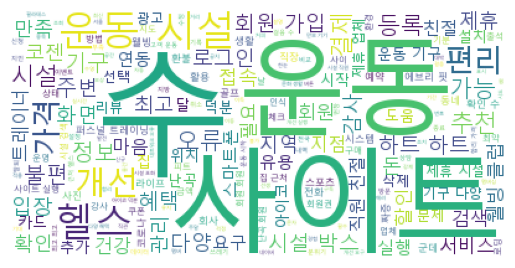

In [47]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') # plt 옵션 : 축 없애기
plt.show()

### 머신러닝 후 결측치 채우기

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               2878 non-null   object
 1   name              2878 non-null   object
 2   reviews           2878 non-null   object
 3   stars             2118 non-null   object
 4   tokenized_review  2878 non-null   object
 5   replaced_review   2878 non-null   object
 6   stopword_review   2878 non-null   object
 7   oneword_review    2624 non-null   object
dtypes: object(8)
memory usage: 180.0+ KB


In [49]:
# 데이터 분류하기
# NaN이 있는 데이터 추출
df_null = df[df['stars'].isna()]

# NaN이 없는 데이터 추출
df_non_null = df[df['stars'].notna()]

In [50]:
df_null[:3]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review
2118,651277e7ddb81e8e96c6c501,Party Saurus Rex,"헬스장과 어플의 수익분배가 어떻게 되는지는 모르겠는데, 다짐어플로 통합회원권 끊고 ...",NaN,"헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 짐 ...","헬스 장 과 어 플 의 수익 분배 가 어떻게 되 는지 는 모르 겠 는데 , 다 운동...",헬스 장 플 수익 분배 운동 시설 통합 회원권 헬스 장 회원 이방인 취급 헬스 장 ...,헬스 수익 분배 운동 시설 통합 회원권 헬스 회원 이방인 취급 헬스 설명 동시 이야...
2119,651277e7ddb81e8e96c6c502,cha park,운동을 좋아하는사람에겐 최고입니다! 너무 잘 사용하고있어 단점이라기보단 이런점이 있...,NaN,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 을 좋아하 는 사람 에겐 최고 입니다 ! 너무 잘 사용 하 고 있 어 단점 이...,운동 에겐 최고 단점 점 점 개 통합 회원권 선택 시 추천 시설 카테고리 세분 시설...,운동 에겐 최고 단점 통합 회원권 선택 추천 시설 카테고리 세분 시설 연관 시설 크...
2120,651277e7ddb81e8e96c6c503,박나래,오랜만에 헬스장에서 운동하고 싶은 생각에 막연하게 인터넷에 쳐보기도하고 번거롭게 전...,NaN,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,오랜만 에 헬스 장 에서 운동 하 고 싶 은 생각 에 막연 하 게 인터넷 에 쳐 보...,헬스 장 운동 인터넷 전화 가격 도 요구 이야기 만 도 부족 맞춤 플 합리 가격 헬...,헬스 운동 인터넷 전화 가격 요구 이야기 부족 합리 가격 헬스 비교 헬스 선택 가능...


In [51]:
df_non_null[:3]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...


In [52]:
df_non_null_stars = df_non_null['stars']
stars_list = df_non_null_stars.tolist()
stars_list[:10]

['별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 1개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 2개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.',
 '별표 5개 만점에 5개를 받았습니다.']

In [53]:
import re

rating_list = list()
for stars in stars_list:
    numbers = re.findall(r'\d+', str(stars))  # 정규표현식을 사용하여 숫자만 추출
    if numbers :
        rating = int(numbers[-1])   # 추출된 숫자 중 마지막 요소인 문자열 형태의 숫자를 정수로 변환
        rating_list.append(rating)
rating_list[:5]

[1, 1, 1, 5, 5]

In [54]:
df_non_null_rating = pd.DataFrame(data=rating_list, columns=['rating'])
df_non_null_rating[:3]

,rating
0,1
1,1
2,1


In [55]:
df_non_null = pd.concat([df_non_null, df_non_null_rating], axis=1)
df_non_null[:3]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review,rating
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능,1
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...,1
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1


### 긍부정 댓글 분리

In [56]:
import numpy as np

df_non_null['classification'] = np.where(df_non_null['rating'] >= 3, '긍정', '부정')
df_non_null[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review,rating,classification
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능,1,부정
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...,1,부정
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1,부정
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...,이동 장소 운동 합리 코젠 제휴 업체 추가 업체 방문 입장 방식 편의 개선 제휴 업...,5,긍정
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...,아이코 덕분 운동 기록 지점 출장 본가 지속 수 라이프 코스 덕분 카페이 용비 대박,5,긍정


### 벡터 토큰화(단어 숫자화)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [58]:
reviews_list = list(df_non_null['reviews'])
reviews_list[:5]

['입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔이 아닌 어플에서 입장하기로 바뀌어 사용치 못 하고 있습니다. 매달 이용료는 나가고 있는 상황이면 고쳐지기 전까지 이용못했던 일자에 대해 보상처리는 되나요?어플을 지웠다 다시 다운 받아봐도 똑같은 상태입니다. 도대체 언제부터 전 사용 가능한가요?',
 '정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말 업뎃이후 문제임 둘. 은행도 아닌데 로그인 타임아웃 적용하나요? 어디까지 사용자 불편을 감수하면서 가실려고.. 셋.충분하게 Test하고 업뎃적용하시는지? 근래 며칠이 멀다 화면이 바뀌는데 순전 관리용이지 고객은 안중에도 없어보임 뭐에 쫒기듯 어설프다',
 '입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데이트 후에 매번 로그인 다시해야하고 위치 자동검색에 시설이 안나오고, 수동검색후 입장하는 기능도 없고 불편함만 늘었습니다. 덕분에 앱 여러번 삭제하고 다시까느라 애꿎은 데이타만 잔뜩쓰고 다시 예전 앱으로 돌아가고 싶습니다',
 '평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말 딱입니다! 제휴 업체도 꾸준히 추가되서 새로운 업체 방문하는게 요즘 낙이네요. 입장방식도 바코드에서 GPS로 바뀌면서 좀 더 편해지고 사용자편의적으로 개선이 되어가고 있어서 좋습니다. 앞으로도 좋은 제휴업체 많이 추가해주세요!!!!',
 '아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 사용지점이 많아서 출장이나 본가에 가게되도 지속적으로 쓸수있는점이 짱이예요! 라이프 코스도 같이 이용중인데 덕분에 카페이용비가 확 낮아졌어요 완전 대박 😀😀']

In [59]:
# 교육(학습)
countVectorizer = CountVectorizer()
countVectorizer.fit(reviews_list)

CountVectorizer()

In [60]:
countVectorizer.vocabulary_

{'입장방식은': 6903,
 '변경됐는데': 3543,
 '어플은': 5559,
 '여전히': 5812,
 '바코드만': 3365,
 '보여집니다': 3627,
 '짐에서는': 8009,
 '더이상': 2164,
 '바코드스캔이': 3370,
 '아닌': 4967,
 '어플에서': 5556,
 '입장하기로': 6917,
 '바뀌어': 3330,
 '사용치': 4008,
 '하고': 8934,
 '있습니다': 6972,
 '매달': 2880,
 '이용료는': 6594,
 '나가고': 1564,
 '있는': 6943,
 '상황이면': 4182,
 '고쳐지기': 1026,
 '전까지': 7301,
 '이용못했던': 6601,
 '일자에': 6859,
 '대해': 2147,
 '보상처리는': 3602,
 '되나요': 2304,
 '어플을': 5560,
 '지웠다': 7892,
 '다시': 1976,
 '다운': 2023,
 '받아봐도': 3407,
 '똑같은': 2538,
 '상태입니다': 4168,
 '도대체': 2186,
 '언제부터': 5586,
 '사용': 3939,
 '가능한가요': 428,
 '정말': 7406,
 '답답하네요': 2093,
 '하나': 8945,
 'gps': 264,
 '100프로': 6,
 '신뢰하나요': 4724,
 '시설선택목록에서': 4641,
 '안보임': 5191,
 '4월말': 186,
 '업뎃이후': 5662,
 '문제임': 3222,
 '은행도': 6424,
 '아닌데': 4970,
 '로그인': 2598,
 '타임아웃': 8635,
 '적용하나요': 7276,
 '어디까지': 5465,
 '사용자': 3986,
 '불편을': 3771,
 '감수하면서': 590,
 '가실려고': 480,
 '충분하게': 8408,
 'test하고': 309,
 '업뎃적용하시는지': 5663,
 '근래': 1292,
 '며칠이': 3003,
 '멀다': 2963,
 '화면이': 9486,
 '바뀌는데': 3327,
 '순전': 4501,

In [61]:
tfidfVectorizer = TfidfVectorizer(use_idf=True)
tfidfVectorizer.fit(reviews_list) # 2차원 배열로 교육

TfidfVectorizer()

In [62]:
tfidfVectorizer.idf_

array([7.96555238, 7.96555238, 7.96555238, ..., 7.96555238, 7.56008727,
       7.96555238])

In [63]:
# 벡터화
features = tfidfVectorizer.transform(reviews_list) # 학습 시 2차원 이용했으므로 변환도 2차원 적용
features

<2118x9716 sparse matrix of type '<class 'numpy.float64'>'
	with 20489 stored elements in Compressed Sparse Row format>

### 목표변수 생성

In [64]:
target = list(df_non_null['classification'])
target[:5]

['부정', '부정', '부정', '긍정', '긍정']

### 머신러닝 학습

In [65]:
from sklearn.svm import SVC

In [66]:
model = SVC()
model.fit(features, target)

SVC()

### 머신러닝을 통한 예측

In [70]:
df_null_review.info()

<class 'pandas.core.series.Series'>
Index: 760 entries, 2118 to 2877
Series name: oneword_review
Non-Null Count  Dtype 
--------------  ----- 
665 non-null    object
dtypes: object(1)
memory usage: 11.9+ KB


In [71]:
df_null_review_dropna = df_null_review.dropna()

In [72]:
df_null_review = df_null['oneword_review']

In [73]:
features_null_review = tfidfVectorizer.transform(df_null_review_dropna)
features_null_review

<665x9716 sparse matrix of type '<class 'numpy.float64'>'
	with 2078 stored elements in Compressed Sparse Row format>

In [74]:
model.predict(features_null_review)

array(['긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '부정', '긍정', '부정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '부정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '부정', '긍

In [75]:
df_null_review['classification'] = model.predict(features_null_review)
df_null_review[:5]

C:\Users\01-02\AppData\Local\Temp\ipykernel_3304\4238394662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_review['classification'] = model.predict(features_null_review)


2118    헬스 수익 분배 운동 시설 통합 회원권 헬스 회원 이방인 취급 헬스 설명 동시 이야...
2119    운동 에겐 최고 단점 통합 회원권 선택 추천 시설 카테고리 세분 시설 연관 시설 크...
2120    헬스 운동 인터넷 전화 가격 요구 이야기 부족 합리 가격 헬스 비교 헬스 선택 가능...
2121    강원도 원주시 단구동 헬스 운동 시설 시설 등록 요청 운동 시설 단구동 시설 등록 ...
2122    추천 운동 시작 헬스 등록 거리 가격 트레이너 정보 중요 확인 운동 시설 직관 설계...
Name: oneword_review, dtype: object

In [76]:
df_total_data = pd.concat([df_non_null, df_null], axis=0)
df_total_data[:5]

,_id,name,reviews,stars,tokenized_review,replaced_review,stopword_review,oneword_review,rating,classification
0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 플 만 운동 시설 스캔 플 입장 사용료 상황 전 용못 일자 보상 처...,입장 방식 수정 운동 시설 스캔 입장 사용료 상황 용못 일자 보상 처리 상태 가능,1.0,부정
1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,프로 신뢰 시설 선택 목록 말 업 문제 은행 로그인 타임아웃 적용 불편 감수 적용 ...,프로 신뢰 시설 선택 목록 문제 은행 로그인 타임아웃 적용 불편 감수 적용 근래 화...,1.0,부정
2,651277e7ddb81e8e96c6bcbd,Google 사용자,입장하려다 시설검색이 안되서 결국 다른곳에 입장했습니다. 기존에 잘 쓰던 앱이 업데...,별표 5개 만점에 1개를 받았습니다.,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 하 려다 시설 검색 이 안 되 서 결국 다른 곳 에 입장 했 습니다 . 기존 ...,입장 시설 검색 곳 입장 기존 사이트 개선 후 로그인 위치 자동 검색 시설 수동 검...,입장 시설 검색 입장 기존 사이트 개선 로그인 위치 자동 검색 시설 수동 검색 입장...,1.0,부정
3,651277e7ddb81e8e96c6bcbe,한반도,평소 이동이 잦고 여러장소에서 운동하는걸 좋아하는 저에게는 합리적인 아이코젠이 정말...,별표 5개 만점에 5개를 받았습니다.,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,평소 이동 이 잦 고 여러 장소 에서 운동 하 는 걸 좋 아 하 는 저 에게 는 합...,이동 장소 운동 걸 합리 코젠 제휴 업체 추가 업체 방문 게 낙 입장 방식 도 편의...,이동 장소 운동 합리 코젠 제휴 업체 추가 업체 방문 입장 방식 편의 개선 제휴 업...,5.0,긍정
4,651277e7ddb81e8e96c6bcbf,나수인,아이코젠 덕분에 운동이 더 즐겁고 꾸준하게 하게 되었어요. 사용기록이 꼼꼼히 남고 ...,별표 5개 만점에 5개를 받았습니다.,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 에 운동 이 더 즐겁 고 꾸준 하 게 하 게 되 었 어요 . 사용 ...,아이코 젠 덕분 운동 기록 지점 출장 본가 지속 수 점 짱 라이프 코스 중 덕분 카...,아이코 덕분 운동 기록 지점 출장 본가 지속 수 라이프 코스 덕분 카페이 용비 대박,5.0,긍정


In [77]:
df_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2878 entries, 0 to 2877
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               2878 non-null   object 
 1   name              2878 non-null   object 
 2   reviews           2878 non-null   object 
 3   stars             2118 non-null   object 
 4   tokenized_review  2878 non-null   object 
 5   replaced_review   2878 non-null   object 
 6   stopword_review   2878 non-null   object 
 7   oneword_review    2624 non-null   object 
 8   rating            2118 non-null   float64
 9   classification    2118 non-null   object 
dtypes: float64(1), object(9)
memory usage: 247.3+ KB


In [78]:
df_total_data.to_csv('../../datasets/total_data1.csv')